### Name : Muhammad Mubeen
### College of Resources & Environment, UCAS
### Course : Data Science
### Project : 1
### Dataset : Wine Quality
### Model : SVM

<h2><Center>Using Support Vector Machine (SVM) for the prediction of Wine Quality</center></h2>

### In this i used many libreries of python and few models and some data visulaizaition techniques
### Dataset Input Variables
### 1. Based on physicochemical test, total 11 features we have have as input
### Dataset Output Variables
### 1. Based on Sensory Data, there is one variable as output

## Step 1: Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

plt.style.use('default')
rcParams["figure.figsize"] = [10, 8]

## Step 2: Load/Read Dataset

In [3]:
df = pd.read_csv('winequality-red.csv')

In [4]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## Wine Dataset Exploratory Data Analysis

### 1. Summery for the wine dataset

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 2. Missing Values Check

In [6]:
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### We can proceed with the data because there are no missing values.

### 3. Heatmap Correlation

#### To analyze the covariance of the possible factors, a heatmap of the pairwise correlation coefficients is mapped. Because none of the correlation coefficients are close to +1 or -1, we can continue with the data without removing any variables.

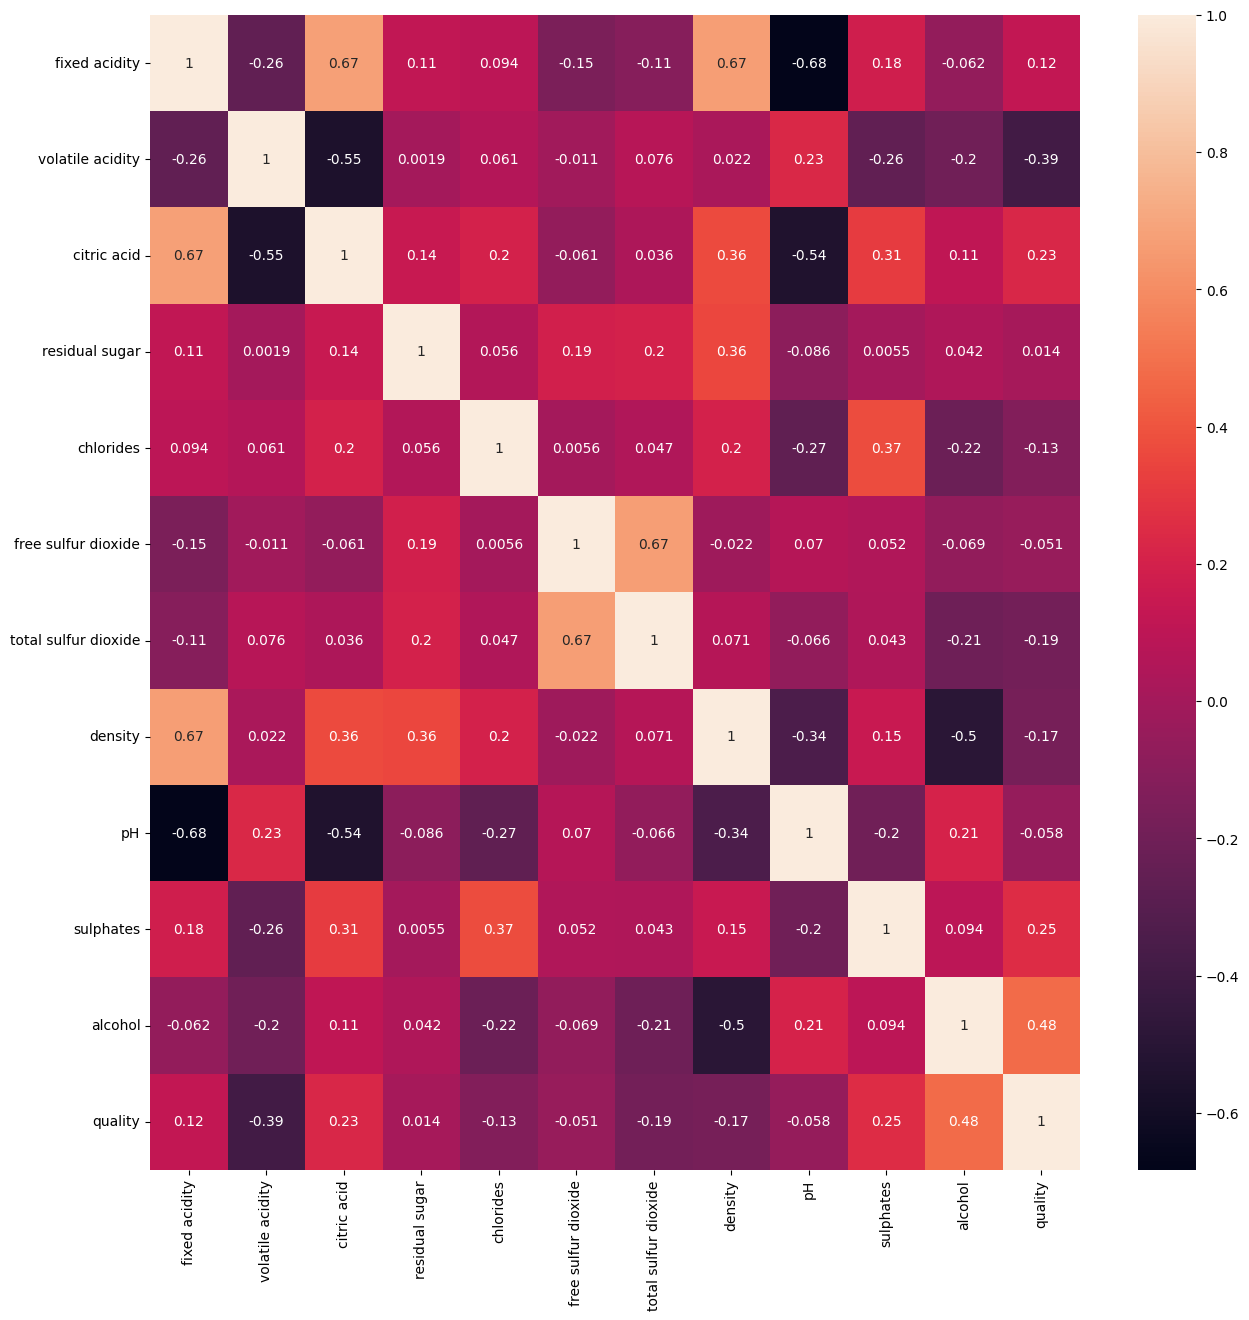

In [7]:
plt.figure(figsize=[15,15])
sns.heatmap(df.corr(), annot=True)
plt.show()

### Train and Test Split
#### Before conducting the train/test split, the independent variable are normalised, and a train/test split of 80/20 is being used.

In [8]:
X = df.drop('quality', axis=1)
X = StandardScaler().fit_transform(X)
y = np.ravel(df[['quality']])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Fitting of Model
#### Support Vector Machine (SVM)

In [10]:
svm = SVC(random_state=0)
svm = svm.fit(X_train, y_train)

In [11]:
print("5-fold cross-validation error rate: {}%".format(round(100-100*np.mean(cross_val_score(svm, X_train, y_train, cv=5)),2)))
print("Out-of-sample error rate: {}%".format(round(100-100*metrics.accuracy_score(y_test, svm.predict(X_test)),2)))

5-fold cross-validation error rate: 39.64%
Out-of-sample error rate: 35.62%


c:\Users\AL REHMAN LAPTOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


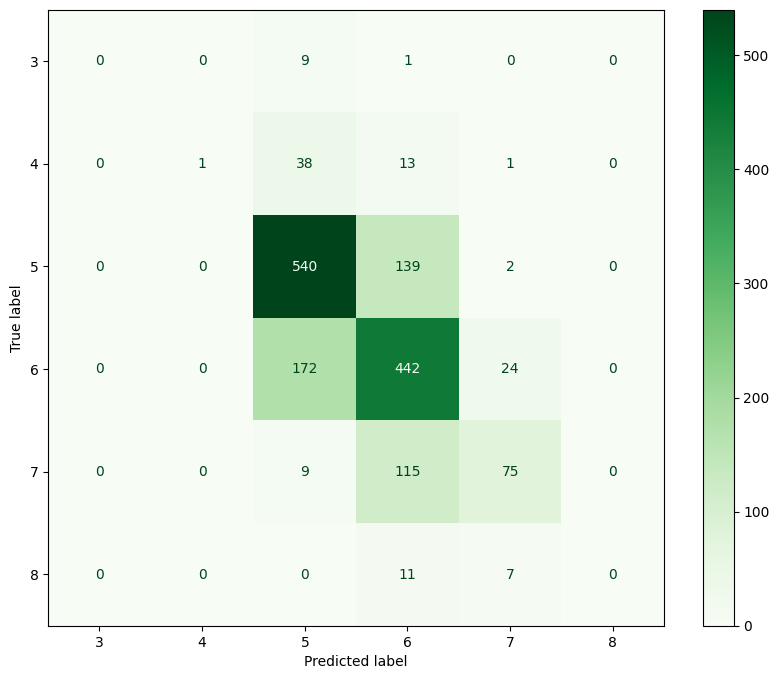

In [12]:
metrics.plot_confusion_matrix(svm, X, y, cmap=plt.cm.Greens)
plt.show()

### Linear Discriminant Analysis
#### LDA, like PCA, can be used in data pre-processing to decrease the number of features, lowering computing cost considerably.

In [13]:
lad = LinearDiscriminantAnalysis()
lad = lad.fit(X_train, y_train)

In [14]:
print("5-fold cross-validation error rate: {}%".format(round(100-100*np.mean(cross_val_score(lad, X_train, y_train, cv=5)),2)))
print("Out-of-sample error rate: {}%".format(round(100-100*metrics.accuracy_score(y_test, lad.predict(X_test)),2)))

5-fold cross-validation error rate: 41.2%
Out-of-sample error rate: 38.75%


c:\Users\AL REHMAN LAPTOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


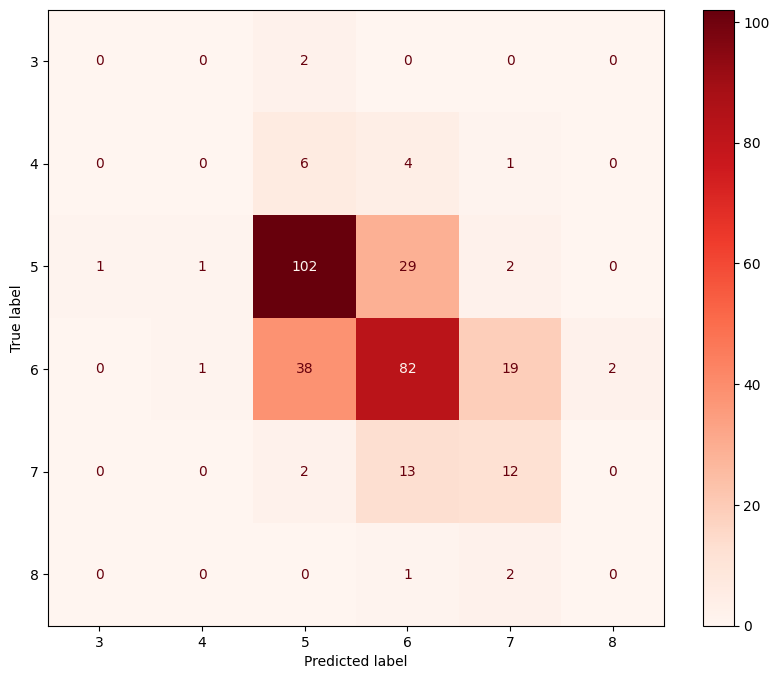

In [15]:
metrics.plot_confusion_matrix(lad, X_test, y_test, cmap=plt.cm.Reds)
plt.show()

## Logestic Regression 
### "Quality" is a traget variable, we can use it as both categorical and numerical variable,
### Logistic Regression is used when the dependent variable(target) is categorical

In [16]:
lg = LogisticRegression(solver='newton-cg', random_state=892)
lg = lg.fit(X_train, y_train)

In [17]:
print("5-fold cross-validation error rate: {}%".format(round(100-100*np.mean(cross_val_score(lg, X_train, y_train, cv=5)),2)))
print("Out-of-sample error rate: {}%".format(round(100-100*metrics.accuracy_score(y_test, lg.predict(X_test)),2)))

5-fold cross-validation error rate: 41.67%
Out-of-sample error rate: 36.56%


c:\Users\AL REHMAN LAPTOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


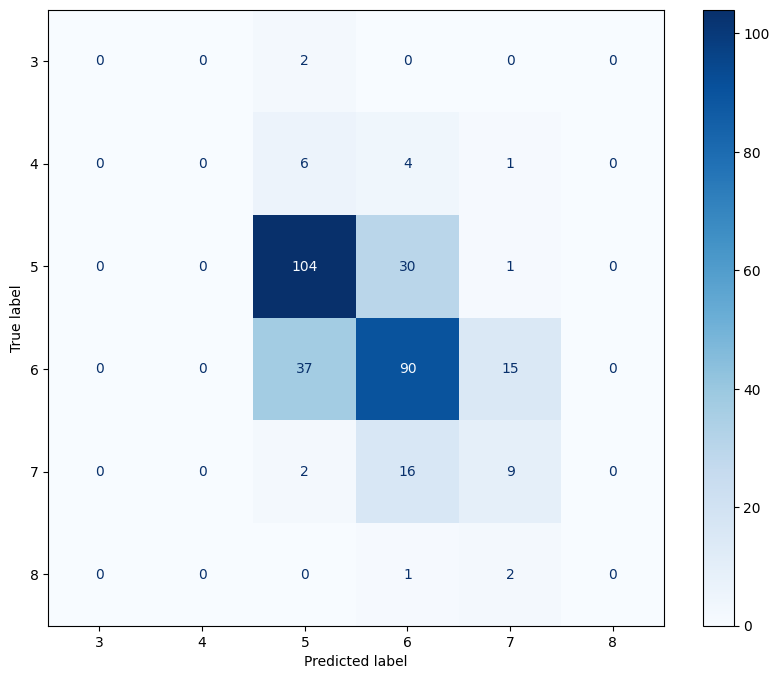

In [18]:
metrics.plot_confusion_matrix(lg, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

### Primary Result Analysis 
#### The results of each model show that they all perform quite poorly due to their extremely high error margins.

In [19]:
for i in range(0,11):
    print("Number of entries with quality of score {}: {}".format(i, sum(df['quality'] == i)))

Number of entries with quality of score 0: 0
Number of entries with quality of score 1: 0
Number of entries with quality of score 2: 0
Number of entries with quality of score 3: 10
Number of entries with quality of score 4: 53
Number of entries with quality of score 5: 681
Number of entries with quality of score 6: 638
Number of entries with quality of score 7: 199
Number of entries with quality of score 8: 18
Number of entries with quality of score 9: 0
Number of entries with quality of score 10: 0


#### Data Transformation
#### We recognize that the data distribution is not ideal, as there are significantly fewer entries with quality scores of 3, 4, 7, as well as 8 than with 5 and 6. Furthermore, no entries in the dataset have a quality score of 0, 1, 2, 9, or 10. As a result of not having enough data points to learn from and make more accurate predictions, this same model would experience a high classification error. As a result, the data must be reclassified.

In [20]:
df.drop(df.query('quality == 5').sample(frac=0.7, random_state=0).index, inplace=True)
df.drop(df.query('quality == 6').sample(frac=0.7, random_state=0).index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [21]:
print('Post-correction:')
for i in range(0,11):
    print("Number of entries with quality of score {}: {}".format(i, sum(df['quality'] == i)))


Post-correction:
Number of entries with quality of score 0: 0
Number of entries with quality of score 1: 0
Number of entries with quality of score 2: 0
Number of entries with quality of score 3: 10
Number of entries with quality of score 4: 53
Number of entries with quality of score 5: 204
Number of entries with quality of score 6: 191
Number of entries with quality of score 7: 199
Number of entries with quality of score 8: 18
Number of entries with quality of score 9: 0
Number of entries with quality of score 10: 0


### Following the resolution of the over-representation of two majority categories, the wine quality scores will be reclassified into three categories:

#### 1. If the wine quality is 4 or lower, it is labelled as Poor (denoted as 0).
#### 2. If the wine quality is between 5 and 6, it is classified as Average (denoted as 1).
#### 3. If the wine quality is 7 or higher, it is classified as Good (denoted as 2).

In [22]:
for i in range(len(df)):
    if df.loc[i, 'quality'] <= 4:
        df.loc[i, 'quality'] = 0
    elif 5 <= df.loc[i, 'quality'] <= 6:
        df.loc[i, 'quality'] = 1
    elif df.loc[i, 'quality'] >= 7:
        df.loc[i, 'quality'] = 2

In [23]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,2
1,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,2
2,5.6,0.615,0.00,1.6,0.089,16.0,59.0,0.9943,3.58,0.52,9.9,1
3,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.9986,3.16,0.88,9.2,1
4,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,2


## Model Re-fitting

In [24]:
X = df.drop('quality', axis=1)
X = StandardScaler().fit_transform(X)
y = np.ravel(df[['quality']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Support Vector Machine (SVM)

In [25]:
svm = SVC(random_state=0)
svm = svm.fit(X_train, y_train)

In [26]:
# Predict the response for test dataset
y_pred = svm.predict(X_test)

In [27]:
#Import Scikit-learn metrics module for accuracy calculation
from sklearn import metrics
score = metrics.accuracy_score(y_test, y_pred)
#Model accuracy: how often is the classifier correct
print("accuracy;", metrics.accuracy_score(y_test, y_pred))

accuracy; 0.7037037037037037


In [28]:
print("5-fold cross-validation error rate: {}%".format(round(100-100*np.mean(cross_val_score(svm, X_train, y_train, cv=5)),2)))
print("Out-of-sample error rate: {}%".format(round(100-100*metrics.accuracy_score(y_test, svm.predict(X_test)),2)))

5-fold cross-validation error rate: 26.85%
Out-of-sample error rate: 29.63%


c:\Users\AL REHMAN LAPTOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


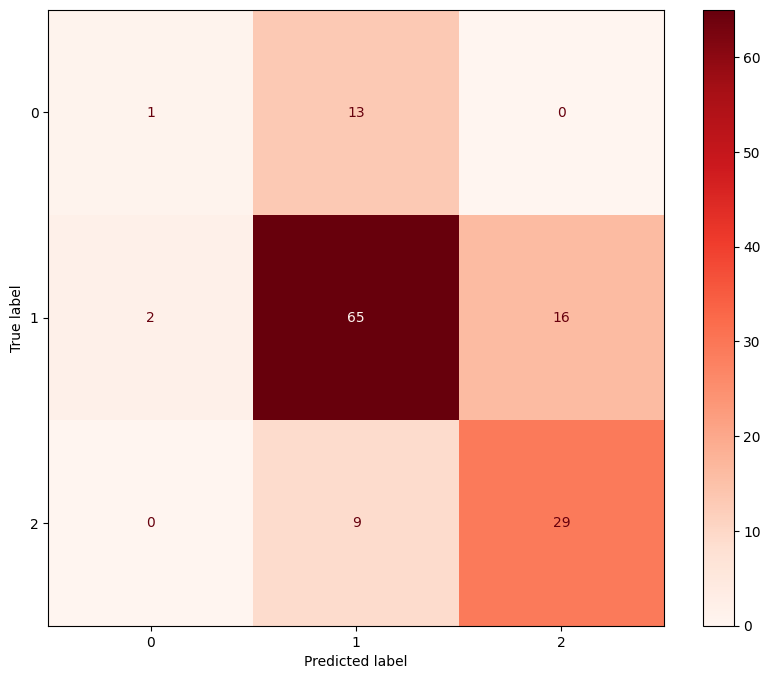

In [29]:
metrics.plot_confusion_matrix(svm, X_test, y_test, cmap=plt.cm.Reds)
plt.show()

### Linear Discriminant Analysis (After data transformation)

In [30]:
lad = LinearDiscriminantAnalysis()
lad = lad.fit(X_train, y_train)

In [31]:
print("20-fold cross-validation error rate: {}%".format(round(100-100*np.mean(cross_val_score(lad, X_train, y_train, cv=5)),2)))
print("Out-of-sample error rate: {}%".format(round(100-100*metrics.accuracy_score(y_test, lad.predict(X_test)),2)))

20-fold cross-validation error rate: 29.26%
Out-of-sample error rate: 29.63%


c:\Users\AL REHMAN LAPTOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


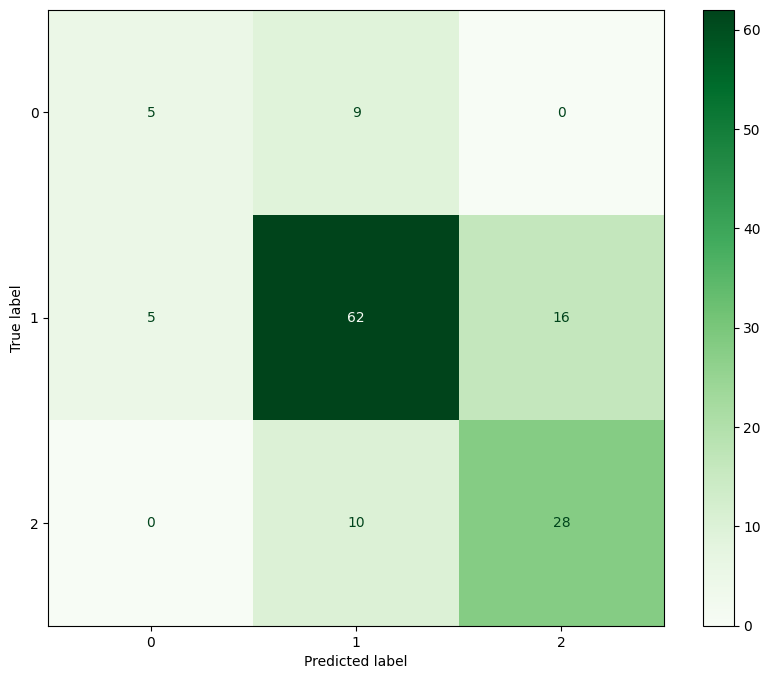

In [32]:
metrics.plot_confusion_matrix(lad, X_test, y_test, cmap=plt.cm.Greens)
plt.show()

### Logistic Regression (After Data Transformation)

In [33]:
lg = LogisticRegression(solver='newton-cg', random_state=892)
lg = lg.fit(X_train, y_train)

In [34]:
print("20-fold cross-validation error rate: {}%".format(round(100-100*np.mean(cross_val_score(lg, X_train, y_train, cv=5)),2)))
print("Out-of-sample error rate: {}%".format(round(100-100*metrics.accuracy_score(y_test, lg.predict(X_test)),2)))

20-fold cross-validation error rate: 29.07%
Out-of-sample error rate: 31.85%


c:\Users\AL REHMAN LAPTOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


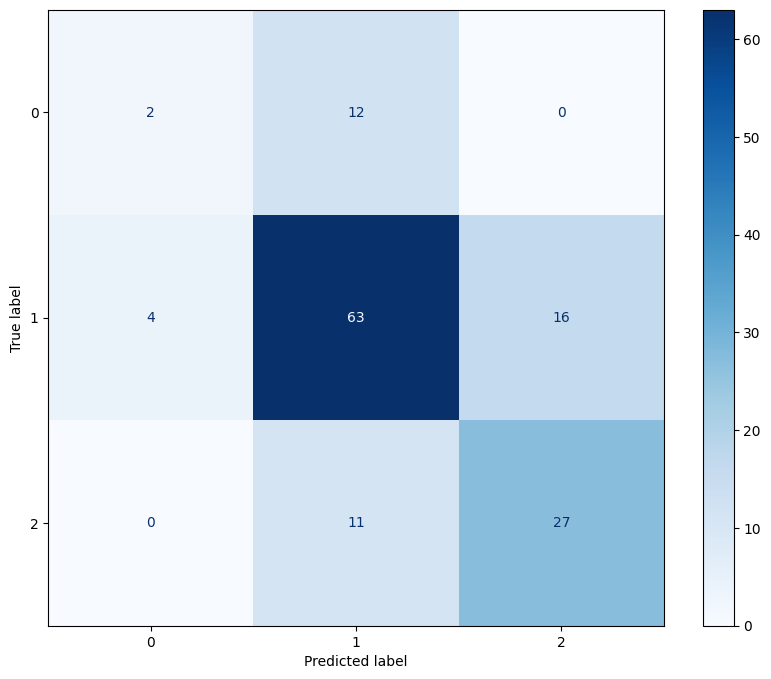

In [35]:
metrics.plot_confusion_matrix(lg, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

### Solver refers to Optimization, solve the optimizatin problems
#### To determine the best combination of parameters, a grid search is used, which iterates through all possible parameter combinations using K-fold cross validation.

In [36]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'solver':('newton-cg', 'lbfgs', 'liblinear', 'saga', 'sag')}
lg = GridSearchCV(LogisticRegression(max_iter=500, random_state=0), parameters, cv=5)
lg = lg.fit(X_train, y_train)
result = pd.DataFrame(lg.cv_results_).sort_values('rank_test_score')[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
result.head(10)

,params,mean_test_score,std_test_score,rank_test_score
12,"{'C': 0.1, 'solver': 'liblinear'}",0.718519,0.021596,1
9,"{'C': 0.01, 'solver': 'sag'}",0.716667,0.022376,2
5,"{'C': 0.01, 'solver': 'newton-cg'}",0.716667,0.022376,2
6,"{'C': 0.01, 'solver': 'lbfgs'}",0.716667,0.022376,2
8,"{'C': 0.01, 'solver': 'saga'}",0.716667,0.022376,2
14,"{'C': 0.1, 'solver': 'sag'}",0.714815,0.017954,6
13,"{'C': 0.1, 'solver': 'saga'}",0.714815,0.017954,6
11,"{'C': 0.1, 'solver': 'lbfgs'}",0.714815,0.017954,6
10,"{'C': 0.1, 'solver': 'newton-cg'}",0.714815,0.017954,6
17,"{'C': 1, 'solver': 'liblinear'}",0.711111,0.021437,10


### Evaluating the tuned Logistic Regression model using "liblinear solver"

In [37]:
lg_tuned = LogisticRegression(C=1, solver='liblinear', random_state=0)
lg_tuned = lg_tuned.fit(X_train, y_train)

In [38]:
print("5-fold cross-validation error rate: {}%".format(round(100-100*np.mean(cross_val_score(lg_tuned, X_train, y_train, cv=5)),2)))
print("Out-of-sample error rate: {}%".format(round(100-100*metrics.accuracy_score(y_test, lg_tuned.predict(X_test)),2)))

5-fold cross-validation error rate: 28.89%
Out-of-sample error rate: 31.11%


### Evaluating the tuned Logistic Regression model using "Ibfgs solver"

In [44]:
lg_tuned = LogisticRegression(C=1, solver='lbfgs', random_state=0)
lg_tuned = lg_tuned.fit(X_train, y_train)

In [45]:
print("5-fold cross-validation error rate: {}%".format(round(100-100*np.mean(cross_val_score(lg_tuned, X_train, y_train, cv=5)),2)))
print("Out-of-sample error rate: {}%".format(round(100-100*metrics.accuracy_score(y_test, lg_tuned.predict(X_test)),2)))

5-fold cross-validation error rate: 29.07%
Out-of-sample error rate: 31.85%


## We can use different solver to solver the optimazation problems
<h3>

1. Liblinear

2. Ibfgs

3. Saga

4. Newton-cg
</h3>

## Decision Regions Plotting (Using Liblinear Solver)

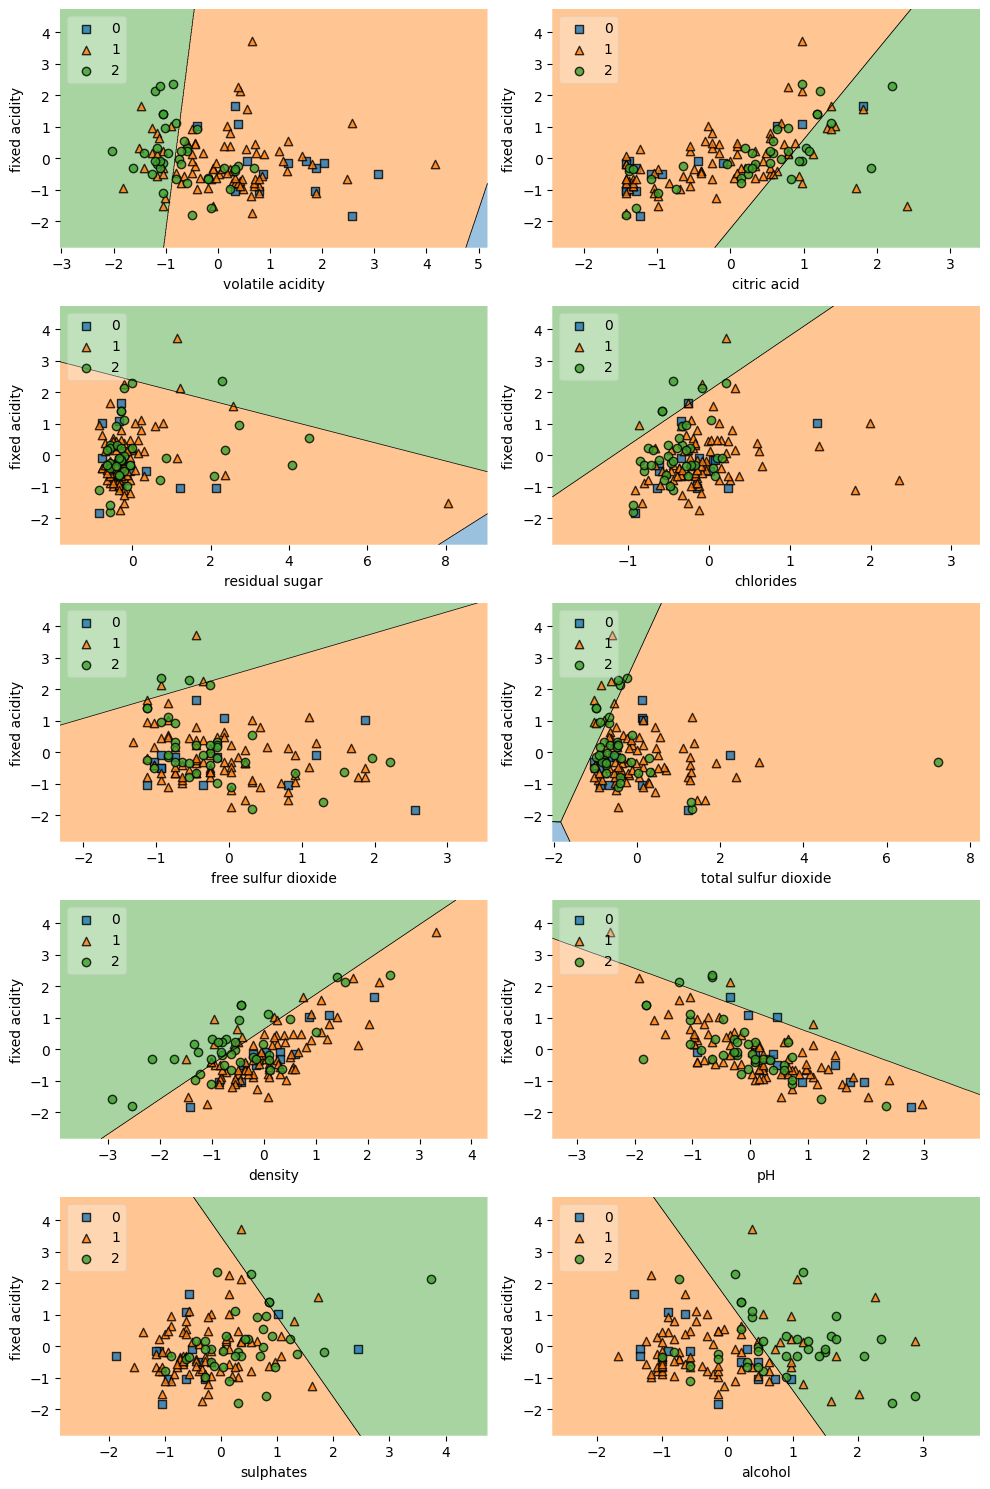

In [42]:
plt.figure(figsize=[10,15])
for i in range(0,10):
    plt.subplot(5,2,i+1)
    lg = LogisticRegression(C=1, solver='liblinear', random_state=0)
    lg = lg.fit(X_train[:,[i+1,0]], y_train)
    plot_decision_regions(X_test[:,[i+1,0]], y_test, clf=lg, legend=2)
    plt.xlabel(df.columns[i+1])
    plt.ylabel(df.columns[0])
    plt.tight_layout()

## Decision Regions Plotting (Using Ibfgs Solver)

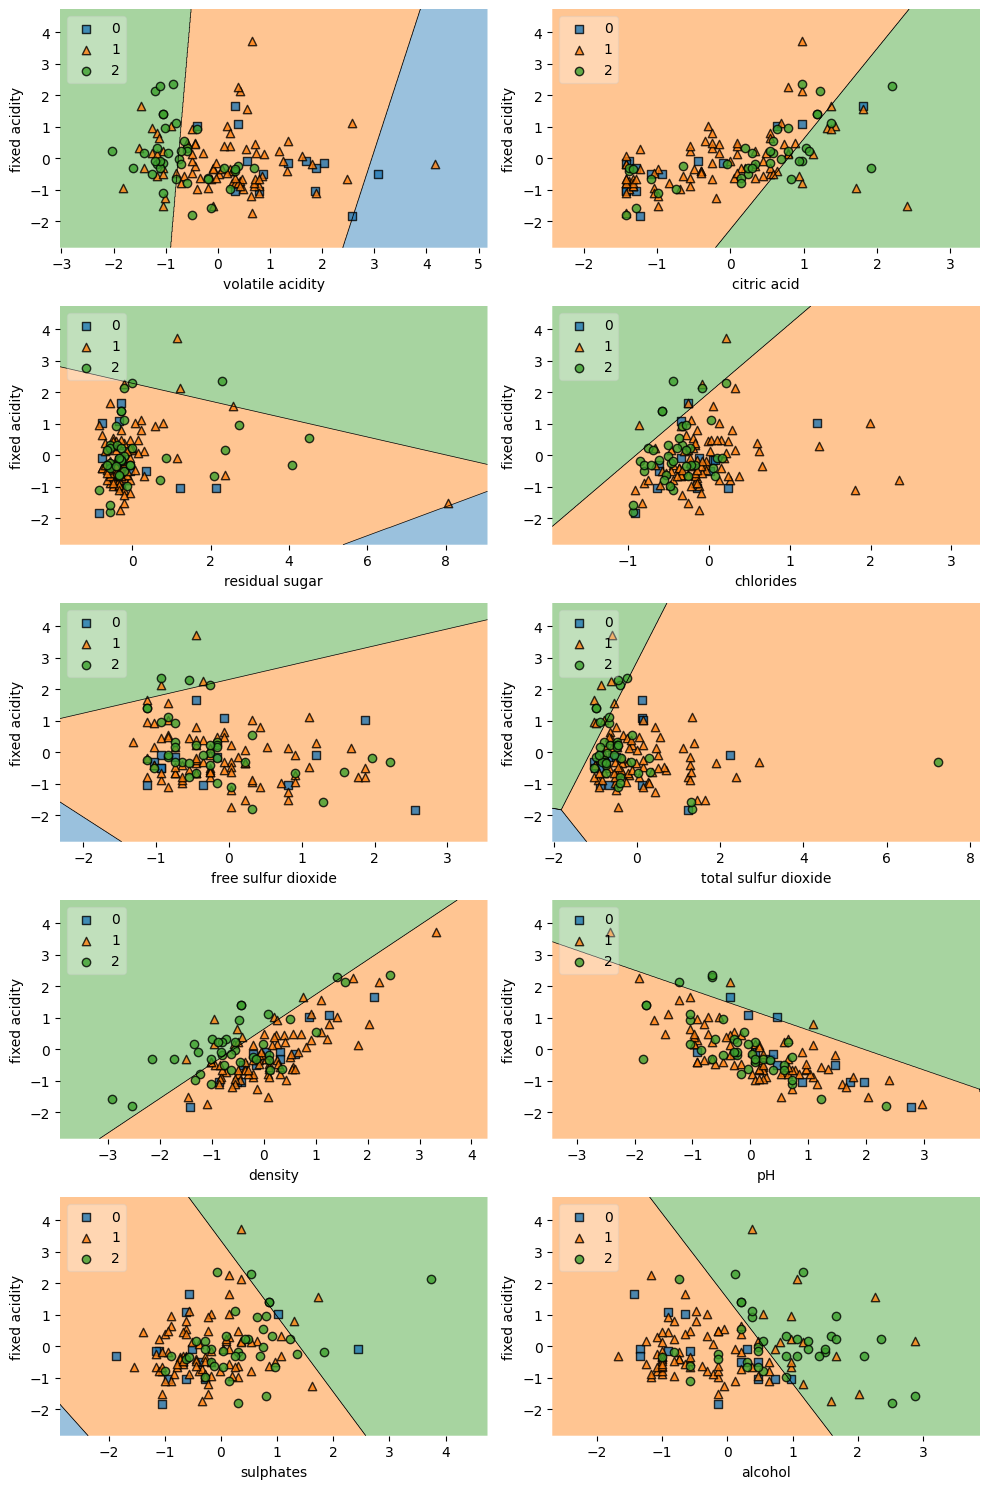

In [48]:
plt.figure(figsize=[10,15])
for i in range(0,10):
    plt.subplot(5,2,i+1)
    lg = LogisticRegression(C=1, solver='lbfgs', random_state=0)
    lg = lg.fit(X_train[:,[i+1,0]], y_train)
    plot_decision_regions(X_test[:,[i+1,0]], y_test, clf=lg, legend=2)
    plt.xlabel(df.columns[i+1])
    plt.ylabel(df.columns[0])
    plt.tight_layout()

<center> <h2> Table 1 </h2> </center>
<center>
<table>
    <tr>
      <th>Method (pre-correction)</th>
      <th>K-fold CV Error Rate</th> 
      <th>Out-of-sample Error Rate</th>
    </tr>
    <tr>
      <td>SVM</td>
      <td>39.64%</td> 
      <td>35.62%</td>
    </tr>
    <tr>
      <td>Linear Discriminant Analysis</td>
      <td>41.2%</td> 
      <td>38.75%</td>
    </tr>
    <tr>
      <td>Logestic Regression</td>
      <td>41.67%</td> 
      <td>36.56%</td>
    </tr>
</table>
</center>

<style>
table {
  border-collapse: collapse;
  width: 45%;
}

th, td {
  padding: 8px;
  text-align: left;
  border-bottom: 1px solid #DDD;
  text-align: center;
}

tr:hover {background-color: black;}
</style>

<center> <h2> Table 2 </h2> </center>
<center>
<table>
    <tr>
      <th>Method (pre-correction)</th>
      <th>K-fold CV Error Rate</th> 
      <th>Out-of-sample Error Rate</th>
    </tr>
    <tr>
      <td>SVM</td>
      <td>26.85%</td> 
      <td>29.64%</td>
    </tr>
    <tr>
      <td>Linear Discriminant Analysis</td>
      <td>29.26%</td> 
      <td>29.63%</td>
    </tr>
    <tr>
      <td>Logestic Regression</td>
      <td>29.07%</td> 
      <td>31.85%</td>
    </tr>
</table>
</center>

<style>
table {
  border-collapse: collapse;
  width: 45%;
}

th, td {
  padding: 8px;
  text-align: left;
  border-bottom: 1px solid #DDD;
  text-align: center;
}

tr:hover {background-color: black;}
</style>

In [40]:
#Confusion Metrix

from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[ 1, 13,  0],
       [ 2, 65, 16],
       [ 0,  9, 29]], dtype=int64)

Text(0.5, 1.0, 'Gaussian Naive Bayes Model accuracey(in %): 70.37037037037037')

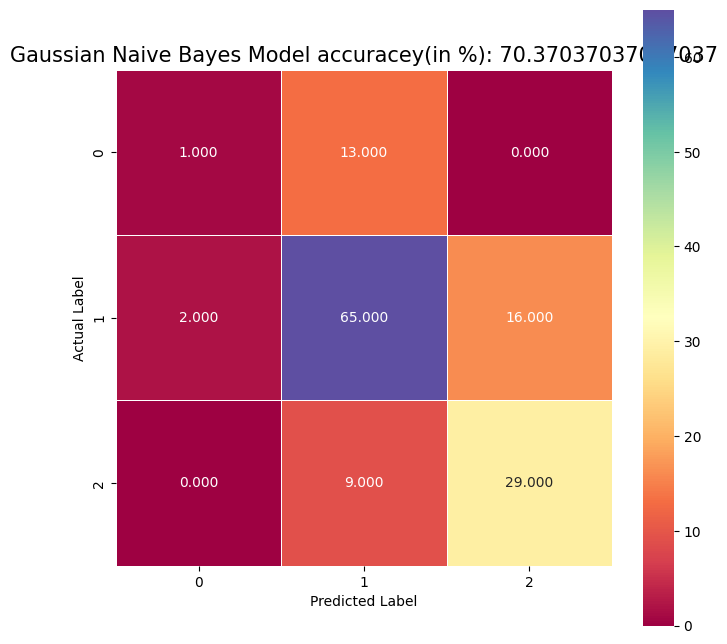

In [41]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Spectral')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Gaussian Naive Bayes Model accuracey(in %): {0}'.format(score*100)
plt.title(all_sample_title, size = 15)

## Conclusion

<h3>

1. The Accuracy of the model is 70%
2. I used pre and post metod and SVM, LDA and Lgestic Regression.
3. In pre method the error rate was high so I transform the data and the do post method correction.
4. I use two type of solver named as Libliner and Ibfgs
5. I copy some code from kaggle and adapt it for my machine learning algorithm.
</h3>

<center>
<h2><b>The End</b></h2>
------------------------------------------------------------------------------------------------------------------------------------------
</center>